# Visualizing the mouse behavior (No laser sessions)

In [1]:
import sys
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/Sabatini Lab/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import model_selection
from sklearn import tree as Tree
import sklearn.tree
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

In [2]:
data = pd.read_csv('/Users/Sabatini Lab/GitHub/mouse_bandit/data/mike_data/trial_data/all_9010_high_processed2.csv',index_col=0)

In [3]:
data.tail(10)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward
616,SOM45,08182017_SOM45,627,49,36,42,2,1,1,1.319,...,1,1,1.705,0.687,1.349,0.622,1,0,1,1
617,SOM45,08182017_SOM45,628,50,37,43,3,1,1,1.896,...,1,1,1.349,0.622,3.488,0.657,1,0,1,1
618,SOM45,08182017_SOM45,629,51,38,44,4,1,1,1.844,...,1,1,3.488,0.657,2.005,0.654,1,0,1,1
619,SOM45,08182017_SOM45,630,52,39,45,5,1,1,1.761,...,1,1,2.005,0.654,1.530,0.690,1,0,1,1
620,SOM45,08182017_SOM45,631,53,40,46,6,1,1,3.564,...,1,1,1.530,0.690,2.210,0.676,1,0,1,1
621,SOM45,08182017_SOM45,632,54,41,47,7,1,1,5.204,...,1,1,2.210,0.676,1.668,0.667,1,0,1,1
622,SOM45,08182017_SOM45,633,55,42,48,8,1,1,2.607,...,1,1,1.668,0.667,3.233,0.374,1,0,1,1
623,SOM45,08182017_SOM45,634,56,43,49,9,1,0,2.113,...,1,1,3.233,0.374,2.411,0.712,1,0,1,1
624,SOM45,08182017_SOM45,635,57,44,50,10,1,1,1.396,...,1,1,2.411,0.712,26.857,0.680,1,0,1,1
625,SOM45,08182017_SOM45,636,58,45,51,11,1,1,1.705,...,1,1,26.857,0.680,1.253,0.678,1,0,1,1


In [4]:
data.shape


(50425, 53)

In [5]:
np.unique(data['Reward Streak'])

array([-18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,
        -5,  -4,  -3,  -2,  -1,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49], dtype=int64)

In [6]:
data['0_trialDuration'].mean()

0.47030175508180466

In [7]:
data[data['Reward Streak'] == -1]['Switch'].mean()

0.2259980204552953

## separate back into individual mice for mouse to mouse comparison

In [8]:
np.unique(data['Mouse ID'])

array(['PV30', 'SOM41', 'SOM42', 'SOM44', 'SOM45'], dtype=object)

In [9]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_PV30 = data[data['Mouse ID'] == 'PV30']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']
datas = []

for s in np.unique(data['Session ID'].values):
    datas.append(data_PV30[data_PV30['Session ID'] == s])
    datas.append(data_SOM42[data_SOM42['Session ID'] == s])
    datas.append(data_SOM41[data_SOM41['Session ID'] == s])
    datas.append(data_SOM44[data_SOM44['Session ID'] == s])
    datas.append(data_SOM45[data_SOM45['Session ID'] == s])

In [10]:
data_PV30.shape, data_SOM42.shape, data_SOM41.shape, data_SOM44.shape, data_SOM45.shape

((5065, 53), (12407, 53), (11114, 53), (7071, 53), (14768, 53))

# p(switch) | switched in ith previous trial

In [11]:
p_switch = np.zeros(20)
for i in np.arange(0,20):
    p_switch[i] = data.iloc[np.where(data['Switch'].values == 1)[0]-i]['Switch'].mean(axis=0)

In [12]:
p_switchy = np.zeros((len(datas),20))

for s,d in enumerate(datas):
    for i in np.arange(0,20):
        p_switchy[s,i] = d.iloc[np.where(d['Switch'].values == 1)[0]-i]['Switch'].mean(axis=0)

In [13]:
errors = p_switchy.std(axis=0) / np.sqrt(len(p_switchy))

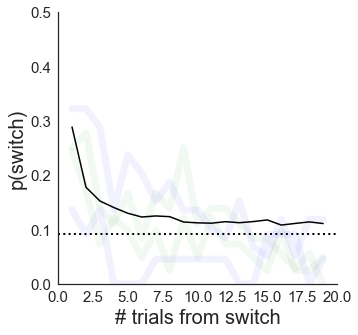

In [14]:
sns.set_style('white')
plt.figure(figsize=(5,5))
for s in range(20):
    if (s%2 == 0):
        plt.plot(np.arange(1,20),p_switchy[s,1:],alpha=0.05,linewidth=7,color='blue')
    else:
        plt.plot(np.arange(1,20),p_switchy[s,1:],alpha=0.05,linewidth=7,color='green')
        
plt.hlines(y=data['Switch'].mean(axis=0),xmin=0,xmax=20,color='black',alpha=1,linewidth=2,linestyles='dotted',label='average')
plt.plot(np.arange(1,20),p_switch[1:],color='black',linewidth=1.5)
plt.fill_between(np.arange(1,20),p_switch[1:]+errors[1:],p_switch[1:]-errors[1:],color='grey')
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.xlabel('# trials from switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine()

# Looking more closely at the switch trials

In [50]:
switches = data['Switch'].values

In [51]:
streak = np.array([3,2,1,-1,-2,-3,-4,-5,-6,-7,-8])
port_streaks = np.arange(0,6)
p_switch_a = np.zeros_like(streak)*0.0
p_switch_b = np.zeros_like(streak)*0.0

for i,s in enumerate(streak): 
        p_switch_a[i] = data[(data['Port Streak'] >= 5) & (data['Reward Streak'] == s)]['Switch'].mean()
        p_switch_b[i] = data[(data['Port Streak'] < 5) & (data['Reward Streak'] == s)]['Switch'].mean()

In [52]:
streak = np.array([3,2,1,-1,-2,-3,-4,-5,-6,-7,-8])
port_streaks = np.arange(0,6)
p_switch_indi_a = np.zeros((len(datas),streak.shape[0]))
p_switch_indi_b = np.zeros_like(p_switch_indi_a)

for j,d in enumerate(datas):
    for i,s in enumerate(streak): 
            p_switch_indi_a[j,i] = d[(d['Port Streak'] >= 5) & (d['Reward Streak'] == s)]['Switch'].mean()
            p_switch_indi_b[j,i] = d[(d['Port Streak'] < 5) & (d['Reward Streak'] == s)]['Switch'].mean()

In [53]:
errors_a = np.nanstd(p_switch_indi_a,axis=0) / np.sqrt(p_switch_indi_a.shape[0])
errors_b = np.nanstd(p_switch_indi_b,axis=0) / np.sqrt(p_switch_indi_a.shape[0])

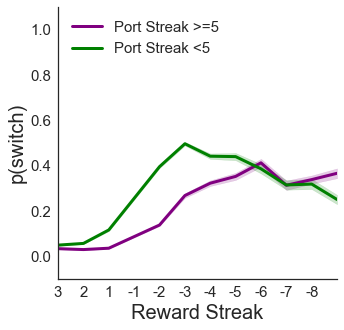

In [55]:
plt.figure(figsize=(5,5))
#plt.vlines(x=0,ymin=0,ymax=1,color='white',linewidth=60,zorder=3)
plt.plot(streak,p_switch_a,label='Port Streak >=5',linewidth=3,zorder=1,color='purple')
plt.fill_between(streak,p_switch_a+errors_a,p_switch_a-errors_a,color='purple',alpha=0.2)
plt.plot(streak,p_switch_b,label='Port Streak <5',linewidth=3,zorder=2,color='green')
plt.fill_between(streak,p_switch_b+errors_b,p_switch_b-errors_b,color='green',alpha=0.2)
plt.xticks(np.arange(3,-8,-1),streak,fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(3,-8)
plt.ylim(-0.1,1.1)
plt.legend(loc='upper left',fontsize=15)
sns.despine()
plt.ylabel('p(switch)',fontsize=20)
plt.xlabel('Reward Streak',fontsize=20)

# Switches when 1_Reward = 0

(0, 0.5)

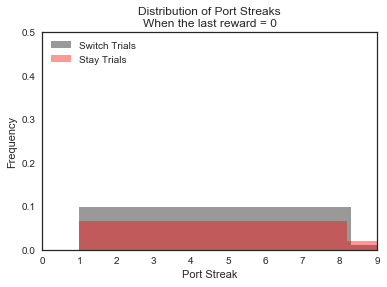

In [50]:
plt.hist(data[(data['1_Reward'] == 0) & (data['Switch'] == 1)]['Port Streak'],color='black',alpha=0.4,normed=True,label='Switch Trials')
plt.hist(data[(data['1_Reward'] == 0) & (data['Switch'] == 0)]['Port Streak'],color='red',alpha=0.4,normed=True,label='Stay Trials')
plt.title('Distribution of Port Streaks\nWhen the last reward = 0')
plt.ylabel('Frequency')
plt.xlabel('Port Streak')
plt.legend(loc='upper left')
plt.xlim(0,9)
plt.ylim(0,0.5)

(array([  5.46083029e-02,   2.66600388e-02,   1.80830441e-02,
          1.30402884e-02,   9.45815997e-03,   8.20345723e-03,
          5.23431334e-03,   2.96435495e-03,   5.65095128e-04,
          7.18341264e-05]),
 array([  1. ,   8.2,  15.4,  22.6,  29.8,  37. ,  44.2,  51.4,  58.6,
         65.8,  73. ]),
 <a list of 10 Patch objects>)

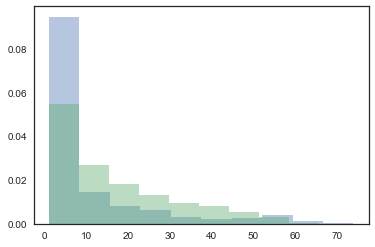

In [52]:
plt.hist(data[data['Switch']==1]['Port Streak'],normed=True,alpha=0.4)
plt.hist(data[data['Switch']==0]['Port Streak'],normed=True,alpha=0.4)

(array([  5.46083029e-02,   2.66600388e-02,   1.80830441e-02,
          1.30402884e-02,   9.45815997e-03,   8.20345723e-03,
          5.23431334e-03,   2.96435495e-03,   5.65095128e-04,
          7.18341264e-05]),
 array([  1. ,   8.2,  15.4,  22.6,  29.8,  37. ,  44.2,  51.4,  58.6,
         65.8,  73. ]),
 <a list of 10 Patch objects>)

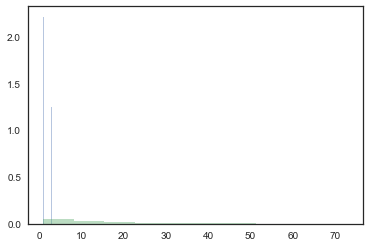

In [53]:
plt.hist(data[data['Port Streak'] <= 3]['Port Streak'],normed=True,alpha=0.4)
plt.hist(data[data['Switch']==0]['Port Streak'],normed=True,alpha=0.4)

In [54]:
data[data['Port Streak'] > 5]['Switch'].mean()

0.056844390177723511

In [55]:
p_switch

array([ 1.        ,  0.30268199,  0.18965517,  0.16123883,  0.15070243,
        0.1408046 ,  0.1302682 ,  0.13537676,  0.13473819,  0.12484036,
        0.12356322,  0.12100894,  0.12228608,  0.12005109,  0.12452107,
        0.12867178,  0.11813538,  0.1155811 ,  0.11909323,  0.1197318 ])

In [56]:
p_switch = np.zeros(10)*0.0
avg = data['Switch'].mean()

for i,s in enumerate(np.arange(1,11)):
    p_switch[i] = data[data['Port Streak'] == s]['Switch'].mean()

p_switches = np.zeros((20,10))*0.0
p_switches_R = np.zeros((20,10))*0.0
p_switches_nR = np.zeros((20,10))*0.0
for j,d in enumerate(datas):
    for i,s in enumerate(np.arange(1,11)):
        p_switches[j,i] = d[d['Port Streak'] == s]['Switch'].mean()
        p_switches_R[j,i] = d[(d['Port Streak'] == s) & (d['1_Reward']==1)]['Switch'].mean()
        p_switches_nR[j,i] = d[(d['Port Streak'] == s) & (d['1_Reward']==0)]['Switch'].mean()

errors = p_switches.std(axis=0) / np.sqrt(p_switches.shape[0])
errors_R = np.nanstd(p_switches_R,axis=0) / np.sqrt(p_switches.shape[0])
errors_nR = np.nanstd(p_switches_nR,axis=0) / np.sqrt(p_switches.shape[0])
p_switch_R = np.nanmean(p_switches_R,axis=0)
p_switch_nR = np.nanmean(p_switches_nR,axis=0)

IndexError: index 20 is out of bounds for axis 0 with size 20

ValueError: operands could not be broadcast together with shapes (10,) (20,) 

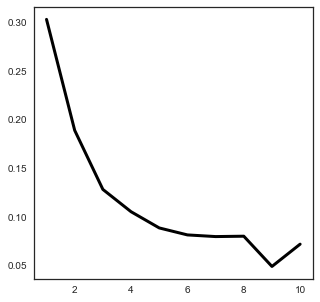

In [57]:
plt.figure(figsize=(5,5))

plt.plot(np.arange(1,11),p_switch,color='black',linewidth=3,label='All Trials')
plt.fill_between(np.arange(1,11),p_switch+errors,p_switch-errors,color='black',alpha=0.5)

plt.plot(np.arange(1,11),p_switch_R,color='green',linewidth=3,label='Previous Trial Rewarded')
plt.fill_between(np.arange(1,11),p_switch_R+errors_R,p_switch_R-errors_R,color='green',alpha=0.5)

plt.plot(np.arange(1,11),p_switch_nR,color='blue',linewidth=3,label='Previous Trial Not Rewarded')
plt.fill_between(np.arange(1,11),p_switch_nR+errors_nR,p_switch_nR-errors_nR,color='blue',alpha=0.5)

plt.hlines(y=avg,xmin=1,xmax=10,linestyle='dotted')
plt.ylim(0,0.7)
plt.ylabel('p(switch)',fontsize=20)
plt.xlabel('# trials since previous switch',fontsize=20)
plt.legend(loc='upper right',fontsize=15)
plt.xticks(np.arange(1,11),[0,1,2,3,4,5,6,7,8,'>8','>9'],fontsize=15)
plt.yticks(fontsize=15)
sns.despine()

In [58]:
c = 0
cs = np.zeros(10)
for j,i in enumerate(np.arange(1,11)):
    c +=  data[data['Port Streak'] == i]['Switch'].sum()/data['Switch'].sum()
    cs[j] = c

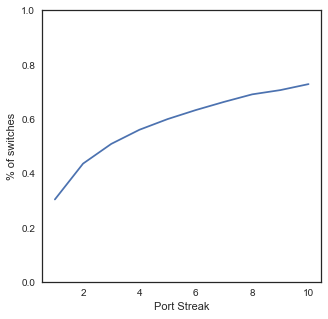

In [59]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,11),cs)
plt.ylim(0,1)
plt.ylabel('% of switches')
plt.xlabel('Port Streak')

## analysis of block switches

In [16]:
data.shape

(50425, 53)

In [17]:
t_block_unique = np.unique(data['Block Trial'].values)
p_switch_block = np.zeros((t_block_unique.shape[0],2))
high_p_port = np.zeros_like(p_switch_block)
trial_block_count = np.zeros_like(t_block_unique)

for t in t_block_unique:
    p_switch_block[int(t),0] = data[data['Block Trial'] == t]['Switch'].mean(axis=0)
    trial_block_count[int(t)] = data[data['Block Trial'] == t].shape[0]
    p_switch_block[int(t),1] = data[data['Block Trial'] == t]['Switch'].std(axis=0) / np.sqrt(trial_block_count[int(t)])
    
    high_p_port[int(t),0] = data[data['Block Trial']==t]['Higher p port'].mean(axis=0)
    high_p_port[int(t),1] = data[data['Block Trial']==t]['Higher p port'].std(axis=0) / np.sqrt(trial_block_count[int(t)])
    

total # of blocks in dataset: ~745


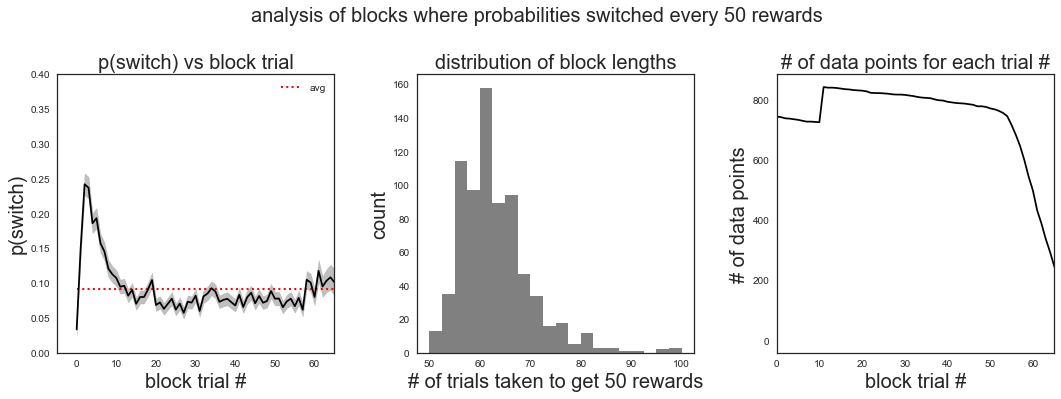

In [18]:
x_end=65
plt.figure(figsize=(15,5))
plt.suptitle('analysis of blocks where probabilities switched every 50 rewards',x=0.5,y=1.1,fontsize=20)

plt.subplot(131)
plt.plot(t_block_unique,p_switch_block[:,0],color='black')
plt.fill_between(t_block_unique,p_switch_block[:,0]+p_switch_block[:,1],p_switch_block[:,0]-p_switch_block[:,1],color='grey',alpha=0.5)
plt.hlines(data['Switch'].mean(axis=0),xmin=0,xmax=x_end,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.legend(loc='upper right')
plt.xlim(-5,x_end)
plt.ylim(0,0.4)
plt.xlabel('block trial #',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) vs block trial',fontsize=20)

plt.subplot(132)
plt.hist(data.iloc[np.where(data['Block Trial']==0)[0]-1]['Block Trial'],bins=20,color='grey')
plt.title('distribution of block lengths',fontsize=20)
plt.xlabel('# of trials taken to get 50 rewards',fontsize=20)
plt.ylabel('count',fontsize=20)

plt.subplot(133)
plt.plot(t_block_unique,trial_block_count,color='black')
plt.title('# of data points for each trial #',fontsize=20)
plt.ylabel('# of data points',fontsize=20)
plt.xlabel('block trial #',fontsize=20)
plt.xlim(0,x_end)

plt.tight_layout()
print('total # of blocks in dataset: ~%.0f' % (np.sum(data['Block Trial']==0)))

In [19]:
data.index = np.arange(data.shape[0])

In [20]:
data['Switch'].mean()

0.092315319781854241

In [22]:
data.tail(10)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward
50415,SOM45,08182017_SOM45,627,49,36,42,2,1,1,1.319,...,1,1,1.705,0.687,1.349,0.622,1,0,1,1
50416,SOM45,08182017_SOM45,628,50,37,43,3,1,1,1.896,...,1,1,1.349,0.622,3.488,0.657,1,0,1,1
50417,SOM45,08182017_SOM45,629,51,38,44,4,1,1,1.844,...,1,1,3.488,0.657,2.005,0.654,1,0,1,1
50418,SOM45,08182017_SOM45,630,52,39,45,5,1,1,1.761,...,1,1,2.005,0.654,1.530,0.690,1,0,1,1
50419,SOM45,08182017_SOM45,631,53,40,46,6,1,1,3.564,...,1,1,1.530,0.690,2.210,0.676,1,0,1,1
50420,SOM45,08182017_SOM45,632,54,41,47,7,1,1,5.204,...,1,1,2.210,0.676,1.668,0.667,1,0,1,1
50421,SOM45,08182017_SOM45,633,55,42,48,8,1,1,2.607,...,1,1,1.668,0.667,3.233,0.374,1,0,1,1
50422,SOM45,08182017_SOM45,634,56,43,49,9,1,0,2.113,...,1,1,3.233,0.374,2.411,0.712,1,0,1,1
50423,SOM45,08182017_SOM45,635,57,44,50,10,1,1,1.396,...,1,1,2.411,0.712,26.857,0.680,1,0,1,1
50424,SOM45,08182017_SOM45,636,58,45,51,11,1,1,1.705,...,1,1,26.857,0.680,1.253,0.678,1,0,1,1


In [23]:
switch_points = data[data['Block Trial'] == 0 ].index.values

In [24]:
switch_points = data[data['Block Trial'] == 0 ].index.values

L = 15
paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
paraswitch_port = np.zeros_like(paraswitch)

for i,point in enumerate(switch_points):

    paraswitch[i,:] = data.iloc[point-L:point+L+10]['Switch']
    paraswitch_port[i,:] = data.iloc[point-L:point+L+10]['Higher p port']
# if final block ends before 40 trials will show error "could not broadcast input array from shape (26) into shape (40)"

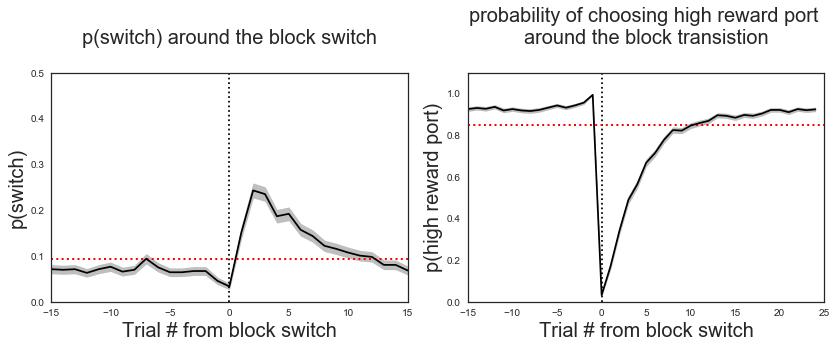

In [26]:
u = paraswitch.mean(axis=0)
s = paraswitch.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(switch)',fontsize=20)
plt.title('p(switch) around the block switch',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L)
plt.ylim(0,0.5)

plt.subplot(122)
u = paraswitch_port.mean(axis=0)
s = paraswitch_port.std(axis=0)
SE = s/np.sqrt(paraswitch.shape[0])
plt.plot(np.arange(-1*L,L+10),u,color='black')
plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
plt.vlines(x=0,ymin=0,ymax=1.1,color='black',linestyle='dotted')
plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
plt.xlabel('Trial # from block switch',fontsize=20)
plt.ylabel('p(high reward port)',fontsize=20)
plt.title('probability of choosing high reward port \naround the block transistion',fontsize=20,x=0.5,y=1.1)
plt.xlim(-1*L,L+10)
plt.ylim(0,1.1)

plt.tight_layout()

## look at individual mice, smarter

In [27]:
data_SOM42 = data[data['Mouse ID'] == 'SOM42']
data_PV30 = data[data['Mouse ID'] == 'PV30']
data_SOM41 = data[data['Mouse ID'] == 'SOM41']
data_SOM44 = data[data['Mouse ID'] == 'SOM44']
data_SOM45 = data[data['Mouse ID'] == 'SOM45']


In [28]:
mice = [data_SOM45, data_SOM44, data_PV30, data_SOM41, data_SOM42]

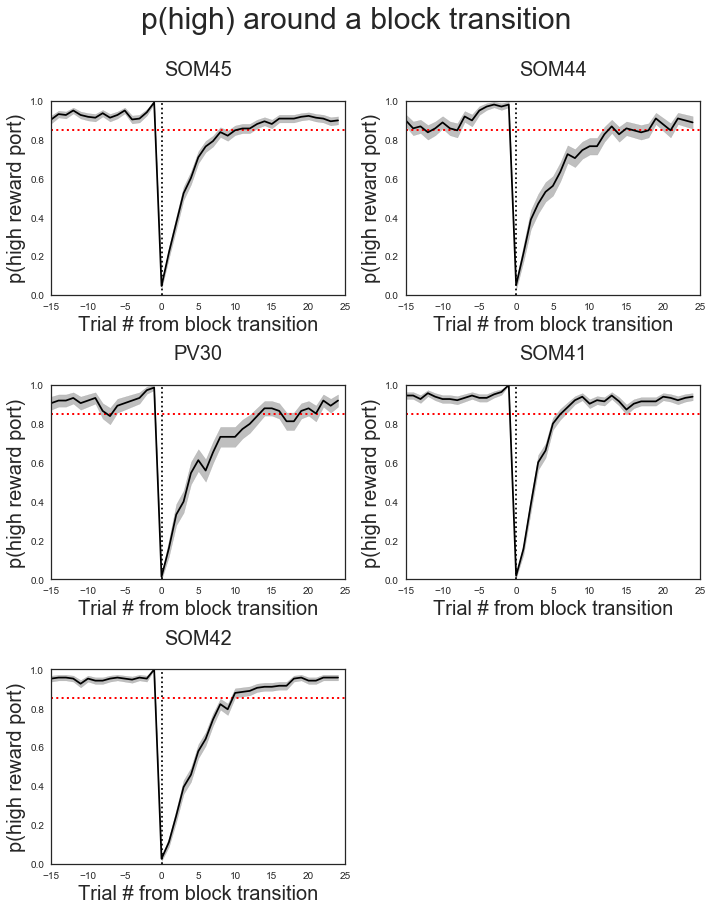

In [29]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(high) around a block transition',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_points = mouse[mouse['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for j,point in enumerate(switch_points):

        paraswitch[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[j,:] = data.iloc[point-L:point+L+10]['Higher p port'] 
        
    plt.subplot(3,2,i+1)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=1,color='black',linestyle='dotted')
    plt.hlines(data['Higher p port'].mean(),xmin=-1*L,xmax=L+10,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block transition',fontsize=20)
    plt.ylabel('p(high reward port)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0], fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L+10)
    plt.ylim(0,1)
        
plt.tight_layout()

In [30]:
data_PV30.shape, data_SOM42.shape, data_SOM41.shape, data_SOM44.shape, data_SOM45.shape

((5065, 53), (12407, 53), (11114, 53), (7071, 53), (14768, 53))

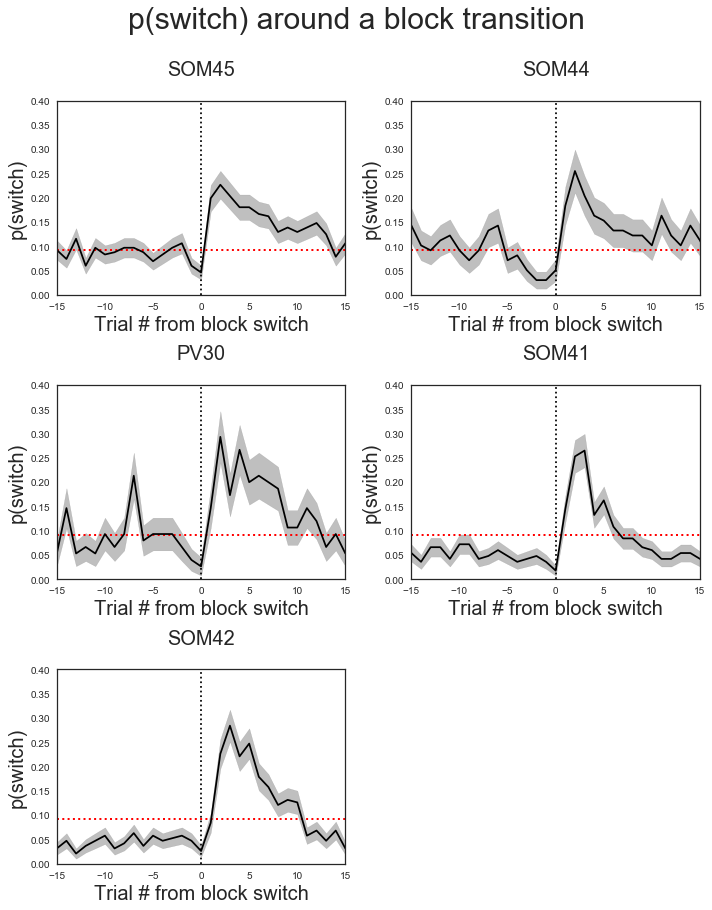

In [31]:
fig = plt.figure(figsize=(10,12))
plt.suptitle('p(switch) around a block transition',x=0.5,y=1.05,fontsize=30)

for i,mouse in enumerate(mice):

    switch_points = mouse[mouse['Block Trial'] == 0 ].index.values

    L = 15
    paraswitch = np.zeros((switch_points.shape[0],L*2 + 10))
    paraswitch_port = np.zeros_like(paraswitch)

    for j,point in enumerate(switch_points):

        paraswitch[j,:] = data.iloc[point-L:point+L+10]['Switch']
        paraswitch_port[j,:] = data.iloc[point-L:point+L+10]['Switch'] 
        
    plt.subplot(3,2,i+1)
    u = paraswitch_port.mean(axis=0)
    s = paraswitch_port.std(axis=0)
    SE = s/np.sqrt(paraswitch.shape[0])
    plt.plot(np.arange(-1*L,L+10),u,color='black')
    plt.fill_between(np.arange(-1*L,L+10),u+SE,u-SE,color='grey',alpha=0.5)
    plt.vlines(x=0,ymin=0,ymax=0.5,color='black',linestyle='dotted')
    plt.hlines(data['Switch'].mean(axis=0),xmin=-1*L,xmax=L+1,color='red',linestyle='dotted',label='avg',linewidth=2)
    plt.xlabel('Trial # from block switch',fontsize=20)
    plt.ylabel('p(switch)',fontsize=20)
    plt.title(mouse['Mouse ID'].values[0],fontsize=20,x=0.5,y=1.1)
    plt.xlim(-1*L,L)
    plt.ylim(0,0.4)
        
plt.tight_layout()


## Looking at p(switch) after rewarded or nonrewarded trials

In [32]:
switch_points = data[data['Block Trial'] == 0 ].index.values
switch_points

array([   52,   122,   189,   255,   313,   374,   467,   526,   585,
         644,   707,   766,   856,   926,   987,  1048,  1112,  1172,
        1237,  1302,  1366,  1423,  1478,  1546,  1637,  1697,  1773,
        1839,  1903,  1999,  2089,  2162,  2249,  2310,  2369,  2430,
        2487,  2545,  2599,  2662,  2723,  2781,  2880,  2939,  3059,
        3130,  3193,  3254,  3314,  3369,  3428,  3501,  3562,  3644,
        3703,  3808,  3874,  3944,  4000,  4068,  4131,  4189,  4247,
        4308,  4368,  4441,  4524,  4594,  4676,  4772,  4840,  4906,
        4961,  5033,  5089,  5154,  5210,  5271,  5356,  5426,  5501,
        5572,  5637,  5712,  5769,  5846,  5903,  5986,  6051,  6127,
        6191,  6264,  6333,  6395,  6460,  6527,  6596,  6684,  6744,
        6807,  6872,  6943,  7001,  7062,  7127,  7193,  7286,  7350,
        7406,  7483,  7546,  7615,  7680,  7742,  7797,  7868,  7928,
        8060,  8125,  8191,  8261,  8331,  8409,  8464,  8534,  8587,
        8670,  8725,

little note on the for loop below. 

took me little while because I had the order of the else-if statements wrong. 

when block_trial == 0 needs to come BEFORE whether the block trial incremented by 1 or not (which is my hokey way of detecting when a new session started where block_trial does not equal 0. 

I suppose a better way would be to detect when the block trial is 11 AND the previous block trial != 10. that would work. okay. switched it to that now. 

In [33]:
block_reward = np.zeros(data.shape[0])
for i in range(data.shape[0]):
    trial = data.iloc[i]
    
    #lets deal with weird cases first:
    #1) the first row
    if(i == 0):
        block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
    
    #3) the first trial of a new block
    elif (trial['Block Trial'] == 0):
        block_reward[i] = 0
    
    #2) the first trial of a new session
    elif (((trial['Block Trial'] - trial_prev['Block Trial']) != 1) and (trial['Block Trial'] == 11)):
        block_reward[i] = trial[['10_Reward','9_Reward','8_Reward','7_Reward','6_Reward',
                                '5_Reward','4_Reward','3_Reward','2_Reward','1_Reward','Reward']].sum()
    else:
        block_reward[i] = block_reward[i-1] + trial['Reward']
    
    trial_prev = trial

In [34]:
reward_switches = np.zeros(np.unique(block_reward).shape[0])
reward_switches_afterR = np.zeros(np.unique(block_reward).shape[0])
reward_switches_afterNoR = np.zeros(np.unique(block_reward).shape[0])
for i,r_block in enumerate(np.unique(block_reward)):
    reward_switches[i] = data[block_reward == r_block]['Switch'].mean()
    reward_switches_afterR[i] = data[((block_reward == r_block) & (data['1_Reward']==1))]['Switch'].mean()
    reward_switches_afterNoR[i] = data[((block_reward == r_block) & (data['1_Reward']==0))]['Switch'].mean()

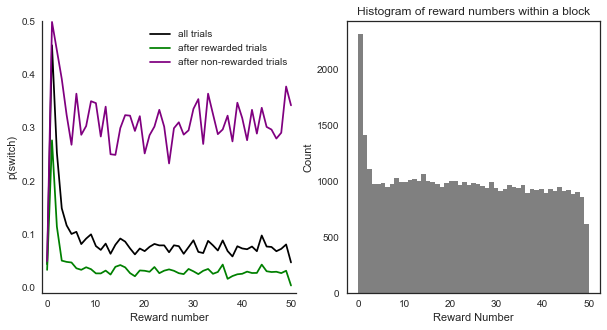

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(np.unique(block_reward),reward_switches,color='black',label='all trials')
plt.plot(np.unique(block_reward),reward_switches_afterR,color='green',label='after rewarded trials')
plt.plot(np.unique(block_reward),reward_switches_afterNoR,color='purple',label='after non-rewarded trials')
plt.xlabel('Reward number')
plt.ylabel('p(switch)')
plt.legend(loc='upper right')
plt.xlim(-1,51)
plt.ylim(-0.01,0.5)
sns.despine()

plt.subplot(122)
plt.hist(block_reward,bins=51,color='grey')
plt.title('Histogram of reward numbers within a block')
plt.xlabel('Reward Number')
plt.ylabel('Count')

In [36]:
data

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward
0,SOM42,06142017_SOM42,11,11,7,2,-1,0,1,5.106,...,0,0,4.024,0.355,2.052,0.426,0,0,1,1
1,SOM42,06142017_SOM42,12,12,8,3,1,0,1,2.365,...,0,1,2.052,0.426,3.879,0.411,0,0,1,1
2,SOM42,06142017_SOM42,13,13,9,4,2,0,1,2.245,...,0,1,3.879,0.411,3.514,0.414,0,0,1,1
3,SOM42,06142017_SOM42,14,14,10,5,3,0,1,3.004,...,0,1,3.514,0.414,2.229,0.394,0,0,1,1
4,SOM42,06142017_SOM42,15,15,11,6,4,0,1,2.813,...,0,1,2.229,0.394,3.317,0.418,0,0,1,1
5,SOM42,06142017_SOM42,16,16,12,7,5,0,1,2.992,...,0,1,3.317,0.418,4.422,0.405,0,0,1,1
6,SOM42,06142017_SOM42,17,17,13,8,6,1,0,1.859,...,0,1,4.422,0.405,5.116,0.523,0,0,1,1
7,SOM42,06142017_SOM42,18,18,14,9,7,1,0,1.515,...,0,1,5.116,0.523,4.748,0.415,0,0,1,1
8,SOM42,06142017_SOM42,19,19,15,10,8,0,1,1.303,...,0,1,4.748,0.415,3.984,0.463,0,0,1,1
9,SOM42,06142017_SOM42,20,20,16,11,9,0,0,4.024,...,0,1,3.984,0.463,1.597,0.636,0,0,1,1
